# Generative Adversarial Networks for X-RAY Classification

The [MedMNIST v2 dataset](https://medmnist.com/) is the MNIST of Medical Imaging containing a large-scale MNIST-like collection of standardized biomedical images.

Can we use this dataset to generate additional synthetic images? Can we condition the data generation on a label? 

Let's try this in this exercise!

## Exercise:


#### 1. Definition of Research Question
We propose to explore one of the MedMNIST datasets and and define a suitable research question. This research question should contain GANs in its hypothesis and aiming towards solving a useful clinical task. Note: Normally, one would also look up the literature to see if the research question is already answered. For now, we skip this step

#### 2. Definition of a Baseline for the Research Question
To test our hypothesis, we need to gather experimental data to compare our solution against the state-of-the-art. The state-of-the-art is our baseline method.

#### 3. Implementation of the Baseline
We implement the baseline and try to do so making our code reusable for our method  (e.g. dataloaders, downstream classifer).  

#### 4. Testing the Baseline and Storage of Results
Now, we test out our baseline implementation and gather the corresponding empirical results and observe its results on our target performance metrics. Can these results be improved upon? Or, can similar results be aachieved with our more e.g. privacy-preserving, interpretable, generalizable, simpler, or more environment friendly solution?

#### 5. Implementation of our GAN Method
The method we hypothesise for the clinical task at hand would need to be implemented to allow testing its usefulness. 

#### 6. Test of our GAN Method and Storage of Results
Now is the time to observe whether our method/intervention yields useful results, as we can readily compare it to our  baseline. 

#### 7. Comparison of our Method and Baseline, Interpretration of Results
Now that we have generated some experimental data, we can interpret our results and clearly demonstrate whether our method was useful for the clinical task. We can now reject or accept our hypothesis.

#### 8. Reflective Account
What could be the reasons why our study did or did not succeed? What do you think are the limitations of our study? What can we learn and takeaway from this exercise? How should it inform our future work? What are the next things to try?

# 1. Definition of a Research question


### Review of MedMNIST Datasets

The MedMNIST dataset including 12 datasets for 2D and 6 datasets for 3D, in total containing 708,069 2D images and 10,214 3D images. The dataset is pre-processed into 28 x 28 (2D) or 28 x 28 x 28 (3D) images alongside the corresponding classification labels for diverse classification tasks (binary/multi-class, ordinal regression and multi-label). More information can be found in the [MedMNIST homepage](https://medmnist.com/).


### Choice of PneumoniaMNIST Dataset for our Study

We propose to use the PneumoniaMNIST dataset from MedMNIST, which contains to 5,856 chest x-rays (train: 4,708, validation: 524, test: 624). The reason for choosing this dataset is that its respective image classification task is binary (pneumonia/normal). Binary classification is likely to be simpler than multi-class classification for data augmentation purposes i.e. only two rather than multiple class-conditioned images need to be generated.
More information on the source of the Pneumonia dataset can be found [here](https://www.sciencedirect.com/science/article/pii/S0092867418301545).


### Definition of our Research Question

We follow the clinical task defined by the dataset providers, which is the classification of resampled chest xrays to diagnose lung pneumonia.

In this regard, our objective would be to maximize the performance of the classifier on the test dataset that should, in theory, resemble the real world distribution if we'd deploy our classifer into a clinical setting. 

Now, we could train a GAN to augment the classfier's training data, which might improve classification performance.

However, the [reported performance](https://medmnist.com/) is already quite strong: 

**ResNet-18: AUC: 0.944, ACC: 0.854**

There seems to be not that much to gain with GAN-based data augmentation (*Note: You may still try if you like*). 

On the other hand, privacy preservation is a topic of immense importance in medical imaging. The pneumonia chest scans are from a pediatric patient cohort that paticularly requires special data protection. We could train a GAN to generate a synthetic dataset that would likely need less privacy protection than the real data. 

*Note: Feel free to checkout the related topic of [differential privacy](https://ai.googleblog.com/2022/02/applying-differential-privacy-to-large.html) that provides a guarantee of privacy, among others, in neural networks.*

In this sense, we can now define our hypothesis:

**H1: Could we, instead of using real patient data, use only synthetic data to train our classifier and achieve comparable performance?**

# 2. Definition of a Baseline for the Research Question


##### We can now define our baseline metrics: 
For example, a ResNet-18 trained on the real training dataset achieved AUC: 0.944 and ACC: 0.854 

##### We define our method: 
A simple CNN trained on a GAN-generated synthetic training dataset.

You are free to change the CNN model and use another architecture (e.g.,[see baseline](https://medmnist.com/))

##### How do we create the GAN-generated dataset?
Feel free to explore any idea you have. You may try out different (un)conditional GAN architectures and loss functions. Further below you will find some optional guidance.

# 3. Implementation of the Baseline

### Getting the Data
As always, you need access to the dataset. In this case you can download the pneumoniamnist.npz from [Zenodo](https://zenodo.org/record/5208230#.YmcLxtNBz0o). However, note that you can also access medMNIST data via the python packaging index ([pip](https://pypi.org/project/medmnist/)) or [Github](https://github.com/MedMNIST/MedMNIST) directly as pytorch dataset class.

For example:

In [1]:
!pip3 install medmnist


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\manue\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import medmnist
from medmnist import INFO, Evaluator
info = INFO['pneumoniamnist']
DataClass = getattr(medmnist, info['python_class'])

task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

Let's further explore the dataset. We can start by printing dataset info and checking the label distribution.

In [3]:
# Download the dataset
train_dataset = DataClass(split='train', download=True)

# Print dataset information
print(train_dataset)

C:\Users\manue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using downloaded and verified file: C:\Users\manue\.medmnist\pneumoniamnist.npz
Dataset PneumoniaMNIST of size 28 (pneumoniamnist)
    Number of datapoints: 4708
    Root location: C:\Users\manue\.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'normal', '1': 'pneumonia'}
    Number of samples: {'train': 4708, 'val': 524, 'test': 624}
    Description: The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.
    License: CC BY 4.0


In [4]:
from collections import Counter

# Check the training label distribution
train_classes = [float(label) for _, label in train_dataset]
print (dict(Counter(train_classes)))

{1.0: 3494, 0.0: 1214}


C:\Users\manue\AppData\Local\Temp\ipykernel_16040\3206429814.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  train_classes = [float(label) for _, label in train_dataset]


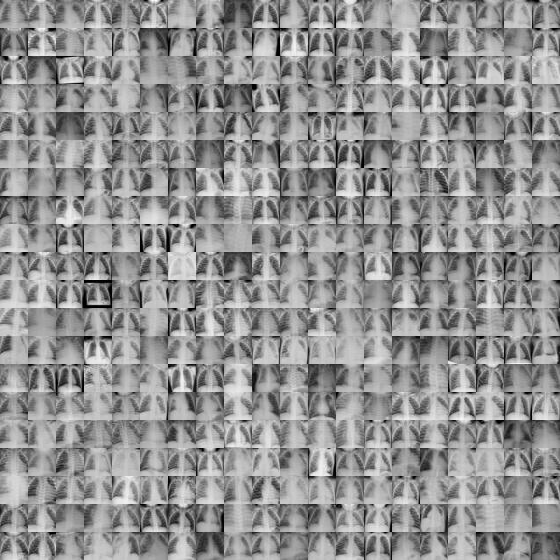

In [5]:
# Let's have a look at some of the training images.
train_dataset.montage(length=20)

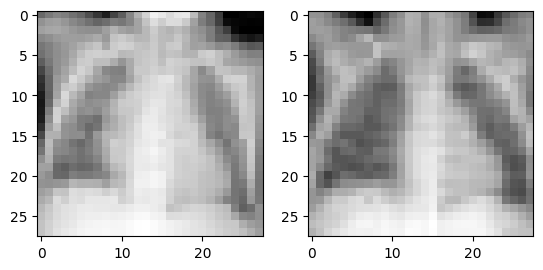

In [6]:
# Let's visually compare pneumial vs. healthy thoraic xray
# 0: normal, 1: pneumonia
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].imshow(train_dataset[0][0], cmap='gray') # pneumonia
ax[1].imshow(train_dataset[200][0],cmap='gray') # normal

### Baseline Model Implementation
To implement the baseline, we start with the [medMNIST github](https://github.com/MedMNIST/MedMNIST), where we can find a [Pytorch getting started notebook](https://github.com/MedMNIST/MedMNIST/blob/main/examples/getting_started.ipynb).

In [7]:
# We define a simple CNN model for pneumonia classification
from torch import nn

class Net(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Net, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU())

        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())

        self.layer5 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = nn.Sequential(
            nn.Linear(64 * 4 * 4, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes-1)) # -1 if we use binary CLF

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

Initialization of model, criterion and optimizer

In [8]:
from torch import optim

lr = 0.001

model_base = Net(in_channels=n_channels, num_classes=n_classes)
    
# define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
    
optimizer = optim.SGD(model_base.parameters(), lr=lr, momentum=0.9)


# 4. Testing the Baseline and Storage of Results


Defining hyperparameters and splitting of the dataset into test, validation, train.

In [9]:
data_flag = 'pneumoniamnist'
download = True  #  set to False if already loaded

NUM_EPOCHS = 5
BATCH_SIZE = 128
#lr = 0.001

info = INFO[data_flag]
#task = info['task']
#n_channels = info['n_channels']
#n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [10]:
from torchvision import transforms, utils
from torch.utils.data import DataLoader, Dataset

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
val_dataset = DataClass(split='val', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

# ingest torch datasets data into torch dataloader
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
val_loader = DataLoader(dataset=val_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: C:\Users\manue\.medmnist\pneumoniamnist.npz
Using downloaded and verified file: C:\Users\manue\.medmnist\pneumoniamnist.npz
Using downloaded and verified file: C:\Users\manue\.medmnist\pneumoniamnist.npz


Defining evaluation metrics such as the area under the receiver operating characteristic curve (AUROC) and the accuracy (ACC).

In [11]:
from sklearn.metrics import roc_auc_score, accuracy_score

def getAUC(y_true, y_score, task):
    '''AUC metric.
    :param y_true: the ground truth labels, shape: (n_samples, n_labels) or (n_samples,) if n_labels==1
    :param y_score: the predicted score of each class,
    shape: (n_samples, n_labels) or (n_samples, n_classes) or (n_samples,) if n_labels==1 or n_classes==1
    :param task: the task of current dataset
    '''
    y_true = y_true.squeeze()
    y_score = y_score.squeeze()

    if task == 'multi-label, binary-class':
        auc = 0
        for i in range(y_score.shape[1]):
            label_auc = roc_auc_score(y_true[:, i], y_score[:, i])
            auc += label_auc
        ret = auc / y_score.shape[1]
    elif task == 'binary-class':
        if y_score.ndim == 2:
            y_score = y_score[:, -1]
        else:
            assert y_score.ndim == 1
        ret = roc_auc_score(y_true, y_score)
    else:
        auc = 0
        for i in range(y_score.shape[1]):
            y_true_binary = (y_true == i).astype(float)
            y_score_binary = y_score[:, i]
            auc += roc_auc_score(y_true_binary, y_score_binary)
        ret = auc / y_score.shape[1]

    return ret

def getACC(y_true, y_score, task, threshold=0.5):
    '''Accuracy metric.
    :param y_true: the ground truth labels, shape: (n_samples, n_labels) or (n_samples,) if n_labels==1
    :param y_score: the predicted score of each class,
    shape: (n_samples, n_labels) or (n_samples, n_classes) or (n_samples,) if n_labels==1 or n_classes==1
    :param task: the task of current dataset
    :param threshold: the threshold for multilabel and binary-class tasks
    '''
    y_true = y_true.squeeze()
    y_score = y_score.squeeze()

    if task == 'multi-label, binary-class':
        y_pre = y_score > threshold
        acc = 0
        for label in range(y_true.shape[1]):
            label_acc = accuracy_score(y_true[:, label], y_pre[:, label])
            acc += label_acc
        ret = acc / y_true.shape[1]
    elif task == 'binary-class':
        if y_score.ndim == 2:
            y_score = y_score[:, -1]
        else:
            assert y_score.ndim == 1
        ret = accuracy_score(y_true, y_score > threshold)
    else:
        ret = accuracy_score(y_true, np.argmax(y_score, axis=-1))

    return ret

Training the baseline pneumonia classification model.

In [12]:
from tqdm import tqdm

for epoch in range(NUM_EPOCHS):
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0
    
    model_base.train()
    for inputs, targets in tqdm(train_loader):
        # forward + backward + optimize
        optimizer.zero_grad()
        outputs = model_base(inputs)
        
        targets = targets.float()
        outputs = outputs.float()

        loss = criterion(outputs, targets)
        
        loss.backward()
        optimizer.step()

100%|██████████| 37/37 [00:02<00:00, 17.11it/s]


Validation and test of the baseline model. This will let us know how good our model when trained on real data.

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import torch

# evaluation
def test(split, model):
    model.eval()
    y_true = torch.tensor([])
    y_score = torch.tensor([])
    
    if split == 'train':
        data_loader = train_loader_at_eval
    elif split == 'val':
        data_loader = val_loader
    else:
        data_loader = test_loader

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)

            targets = targets.to(torch.float32)
            outputs = outputs.sigmoid()
            
            y_true = torch.cat((y_true, targets), 0)
            y_score = torch.cat((y_score, outputs), 0)

        y_true = y_true.numpy()
        y_score = y_score.detach().numpy()
        
        evaluator = Evaluator(data_flag, split)
        metrics = evaluator.evaluate(y_score)
        
        acc = getACC(y_true, y_score, task)
        auc = getAUC(y_true, y_score, task)
    
        print('%s  auc: %.3f  acc:%.3f' % (split, auc, acc))
        return acc, auc, y_true

        
print('==> Evaluating baseline model ...')
acc, auc, y_true = test('train', model_base)
acc, auc, y_true = test('val', model_base)
acc, auc, y_true = test('test', model_base)

==> Evaluating baseline model ...
train  auc: 0.992  acc:0.959
val  auc: 0.991  acc:0.958
test  auc: 0.949  acc:0.845


# 5 Definition and Implementation of our GAN Method

#### GAN Architecture Choice

You may use any GAN architecture and loss function you deem suitable. 

To give some guidance, you could try a Deep Convolutional GAN ([DCGAN](https://arxiv.org/abs/1511.06434)). A helpful DCGAN implementation tutorial can be found [here](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html). 

*Note that you will need to adjust the layers of the network to match the dimensions of the input data.*

DCGAN is an unconditional GAN architecture, which means that the data generation process is not controlled by the label information (pneumonia/normal). Hence, you would need to [extend the DCGAN architecture to a (DC)CGAN](https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/) to be able to feed the labels as input into the generator and discriminator. 

An alternative to the class-conditional GAN is to train an unconditional GAN twice - once on data with positive label and once on data with negative label. 

*Note, instead of CGAN, you could also extend your DCGAN to the [Auxiliary Classifier GAN (ACGAN)] (https://arxiv.org/abs/1610.09585) architecture*. 

Also, feel free to optionally use another deep generative model for this task instead of a GAN. For example, here you find a [tutorial](https://github.com/Project-MONAI/GenerativeModels/blob/main/tutorials/generative/classifier_free_guidance/2d_ddpm_classifier_free_guidance_tutorial.ipynb) for training a class-conditional diffusion model.

### Solution

For the solution I used as base the [DCGAN architecture](https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/) given as an example. I had to modify the number of classes and how the model loaded the dataset.

In [14]:
# extract data from dataset
train_loader = next(iter(DataLoader(train_dataset, batch_size=len(train_dataset))))
train_set, train_labels = train_loader[0].numpy(), train_loader[1].numpy()
# Change shape (1,28,28) to (28,28,1)
train_set = train_set.reshape((train_set.shape[0], 28, 28, 1))
train_labels = train_labels.reshape((train_labels.shape[0]))
print(train_set.shape)
print(train_labels.shape)

(4708, 28, 28, 1)
(4708,)


In [15]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Concatenate

#### Define Discriminator

In [16]:
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1), n_classes=2):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# scale up to image dimensions with linear activation
	n_nodes = in_shape[0] * in_shape[1]
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((in_shape[0], in_shape[1], 1))(li)
	# image input
	in_image = Input(shape=in_shape)
	# concat label as a channel
	merge = Concatenate()([in_image, li])
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
	fe = LeakyReLU(alpha=0.2)(fe)
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	# flatten feature maps
	fe = Flatten()(fe)
	# dropout
	fe = Dropout(0.4)(fe)
	# output
	out_layer = Dense(1, activation='sigmoid')(fe)
	# define model
	model = Model([in_image, in_label], out_layer)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model


#### Define Generator

In [17]:
# define the standalone generator model
def define_generator(latent_dim, n_classes=2):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# linear multiplication
	n_nodes = 7 * 7
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((7, 7, 1))(li)
	# image generator input
	in_lat = Input(shape=(latent_dim,))
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	gen = Dense(n_nodes)(in_lat)
	gen = LeakyReLU(alpha=0.2)(gen)
	gen = Reshape((7, 7, 128))(gen)
	# merge image gen and label input
	merge = Concatenate()([gen, li])
	# upsample to 14x14
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
	gen = LeakyReLU(alpha=0.2)(gen)
	# upsample to 28x28
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
	# output
	out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
	# define model
	model = Model([in_lat, in_label], out_layer)
	return model

#### Define GAN

In [18]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# get noise and label inputs from generator model
	gen_noise, gen_label = g_model.input
	# get image output from the generator model
	gen_output = g_model.output
	# connect image output and label input from generator as inputs to discriminator
	gan_output = d_model([gen_output, gen_label])
	# define gan model as taking noise and label and outputting a classification
	model = Model([gen_noise, gen_label], gan_output)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

#### Other functions needed
We also need to define functions to generate real samples by randomly picking samples from the dataset, and for creating fake samples with a noise latent space vector.

In [19]:
# # select real samples
def generate_real_samples(dataset, n_samples):
	# split into images and labels
	images, labels = dataset
	# choose random instances
	ix = randint(0, images.shape[0], n_samples)
	# select images and labels
	X, labels = images[ix], labels[ix]
	# generate class labels
	y = ones((n_samples, 1))
	return [X, labels], y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=2):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input, labels_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict([z_input, labels_input])
	# create class labels
	y = zeros((n_samples, 1))
	return [images, labels_input], y

#### Training the GAN

In [20]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			[X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
			# generate 'fake' examples
			[X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
			# prepare points in latent space as input for the generator
			[z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
	# save the generator model
	g_model.save('cgan_generator.h5')
	

In [21]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load dataset
dataset = [train_set, train_labels]

# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

C:\Users\manue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 0s 3ms/step
>1, 1/36, d1=0.684, d2=0.695 g=0.692
2/2 [==============================] - 0s 6ms/step
>1, 2/36, d1=0.641, d2=0.700 g=0.687
2/2 [==============================] - 0s 6ms/step
>1, 3/36, d1=0.600, d2=0.710 g=0.676
2/2 [==============================] - 0s 6ms/step
>1, 4/36, d1=0.571, d2=0.728 g=0.662
2/2 [==============================] - 0s 6ms/step
>1, 5/36, d1=0.537, d2=0.747 g=0.649
2/2 [==============================] - 0s 6ms/step
>1, 6/36, d1=0.522, d2=0.771 g=0.635
2/2 [==============================] - 0s 6ms/step
>1, 7/36, d1=0.490, d2=0.784 g=0.635
2/2 [==============================] - 0s 5ms/step
>1, 8/36, d1=0.486, d2=0.779 g=0.659
2/2 [==============================] - 0s 5ms/step
>1, 9/36, d1=0.465, d2=0.734 g=0.711
2/2 [==============================] - 0s 5ms/step
>1, 10/36, d1=0.478, d2=0.656 g=0.787
2/2 [==============================] - 0s 6ms/step
>1, 11/36, d1=0.454, d2=0.620 g=0.836
2/2 [=========================

Lastly, I defined a way to generate the synthetic dataset

In [22]:
from keras.models import load_model
import numpy as np

def generate_synthetic_dataset(n_samples, path_model, balance=0.5):
    # Load model
    model = load_model(path_model)

    # Generate images
    latent_points, labels = generate_latent_points(100, n_samples, 2)
    
    n_split = n_samples//2
    # Specify labels
    false_label = np.asarray([0 for x in range(n_split)])
    true_label = np.asarray([1 for x in range(n_samples - n_split)])
    labels = np.concatenate((false_label, true_label),axis=0)
    X = model.predict([latent_points, labels])
    # Reshape to n_samples, 1, 28, 28
    X = X.reshape((n_samples, 1, 28, 28))
    with open("./images/data.npy", "wb") as f:
        np.save(f, X)
    with open("./images/data_labels.npy", "wb") as f:
        np.save(f, labels)

NUM_GEN_SAMPLES = 6000
generate_synthetic_dataset(NUM_GEN_SAMPLES, 'cgan_generator.h5')

188/188 [==============================] - 1s 7ms/step


#### Synthetic Data Evaluation Metric

Given our hypothesis, we need to evaluate the GAN based on the downstream task i.e. the classification performance (AUC, ACC). However, we should also report a fidelity and diversity estimate of our synthetic data. This is not only useful as additional metric, but also as stopping criterion of GAN training (e.g., n epochs without improvement). We propose you use the [Fréchet Inception Distance](https://github.com/mseitzer/pytorch-fid), but feel free to suggest other or additional metrics. Feel free to use existing packages such as the [pytorch-fid](https://pypi.org/project/pytorch-fid/) package.

Lets evaluate how the model looks

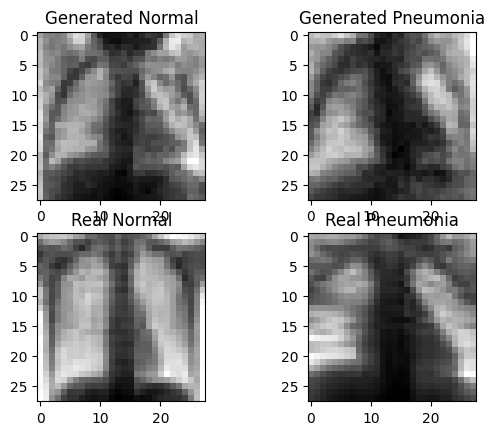

In [23]:
import matplotlib.pyplot as plt

with open("./images/data.npy", "rb") as f:
    X_train = np.load(f)
with open("./images/data_labels.npy", "rb") as f:
    y_train =  np.load(f)

fig, ax = plt.subplots(2, 2)

ax[0,0].imshow(X_train[0].reshape((28,28,1)), cmap="gray_r")
ax[0,0].set_title("Generated Normal")
ax[0,1].imshow(X_train[-1].reshape((28,28,1)), cmap="gray_r")
ax[0,1].set_title("Generated Pneumonia")

ax[1,0].imshow(train_set[train_labels == 0][0].reshape((28,28,1)), cmap="gray_r")
ax[1,0].set_title("Real Normal")
ax[1,1].imshow(train_set[train_labels == 1][1].reshape((28,28,1)), cmap="gray_r")
ax[1,1].set_title("Real Pneumonia")
plt.show()

For the FID score I loaded the pytorch-fid module into powershell and executed the command: ```python -m pytorch_fid FID/data1 FID/data2 --device cuda:0```.

So I got as result the given FID of 192.017, which is not too bad. I only calculated it in 2500 images as it takes a while.

In [24]:
!python -m pytorch_fid FID/data1 FID/data2 --device cuda:0

FID:  192.01725814733598



100%|██████████| 51/51 [00:12<00:00,  4.03it/s]

100%|██████████| 51/51 [00:10<00:00,  4.95it/s]


# 6. Test of our GAN Method and Storage of Results

Now that you have trained your GAN, it is time for the big moment of testing our hypothesis. To do so, a balanced classifier training dataset (50% pneumonia, 50% normal) consisting only of synthetic data is suggested. You may sample this dataset from your trained conditional generator, store on disc and load it again here. 

Below some helper code to help define a torch CustomImageDataset Class based on the generated images that are loaded from disc.

In [25]:
generated_imgs_w_label_0 = X_train[y_train == 0]
generated_imgs_w_label_1 = X_train[y_train == 1]

In [26]:
from torch.utils.data import Dataset
import pandas as pd

class CustomImageDataset(Dataset):
    def __init__(self, imgs_label_0, imgs_label_1, transform=None, target_transform=None):
        self.img_labels = pd.DataFrame(
            np.concatenate((np.zeros(len(imgs_label_0), dtype=int),
                            np.ones(len(imgs_label_1), dtype=int)))
        )
        self.images = np.concatenate((imgs_label_0, imgs_label_1))
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = torch.from_numpy(self.images[idx])
        label = np.array([self.img_labels.iloc[idx, 0]])
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [27]:
# Create torch dataset with generated images 
train_gen_dataset = CustomImageDataset(generated_imgs_w_label_0, generated_imgs_w_label_1)
# Create torch dataloader 
train_gen_loader = DataLoader(dataset=train_gen_dataset, batch_size=BATCH_SIZE, shuffle=True)

Training of the classifier, as was done above with real data, but now with the generated dataset.

In [28]:
lr = 0.001

eval_model = Net(in_channels=n_channels, num_classes=2)
    
# define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
    
optimizer = optim.SGD(eval_model.parameters(), lr=lr, momentum=0.9)

for epoch in range(NUM_EPOCHS):
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0
    
    eval_model.train()
    for inputs, targets in tqdm(train_gen_loader):
        # forward + backward + optimize
        optimizer.zero_grad()
        outputs = eval_model(inputs)
        
        targets = targets.float()
        outputs = outputs.float()
        
        loss = criterion(outputs, targets)
        
        loss.backward()
        optimizer.step()

100%|██████████| 47/47 [00:02<00:00, 21.42it/s]


Test of the classifier, as was done above with real data, but now with the generated dataset.

In [29]:
print('==> Evaluating baseline model ...')
acc, auc, y_true = test('train', eval_model)
acc, auc, y_true = test('val', eval_model)
acc, auc, y_true = test('test', eval_model)

==> Evaluating baseline model ...
train  auc: 0.972  acc:0.920
val  auc: 0.972  acc:0.906
test  auc: 0.952  acc:0.883


# 7. Comparison of our Method and Baseline, Interpretration of Results

You may use some visualization techniques here to compare the baseline (i) with your method (ii). For example, it would be interesting to plot both ROC-AUC curves to visually compare them. Another visualization option is a confusion matrix for (i) and (ii).

In [30]:
# example function for plotting multiple ROC-AUC curve in one figure.
def plot_roc_cur(fpr1, tpr1, fpr2, tpr2, auc1, auc2, name):  
    plt.plot(fpr1, tpr1, color='orange', label='Classifier 1 (AUROC = %0.3f)' % auc1)
    plt.plot(fpr2, tpr2, color='gray', label='Classifier 2 (AUROC = %0.3f)' % auc2)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve' + name)
    plt.legend()
    plt.show()

In [31]:
from sklearn.metrics import roc_curve
# COPY FROM THE OTHER TEST FUNCTION
def test_roc(split, model):
    model.eval()
    y_true = torch.tensor([])
    y_score = torch.tensor([])
    
    if split == 'train':
        data_loader = train_loader_at_eval
    elif split == 'val':
        data_loader = val_loader
    else:
        data_loader = test_loader

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)

            targets = targets.to(torch.float32)
            outputs = outputs.sigmoid()
            
            y_true = torch.cat((y_true, targets), 0)
            y_score = torch.cat((y_score, outputs), 0)

        y_true = y_true.numpy()
        y_score = y_score.detach().numpy()
        
        auc = getAUC(y_true, y_score, task)

        # Values for plotting ROC-AUC curve
        fpr, tpr, _ = roc_curve(y_true, y_score)
        return fpr, tpr, auc

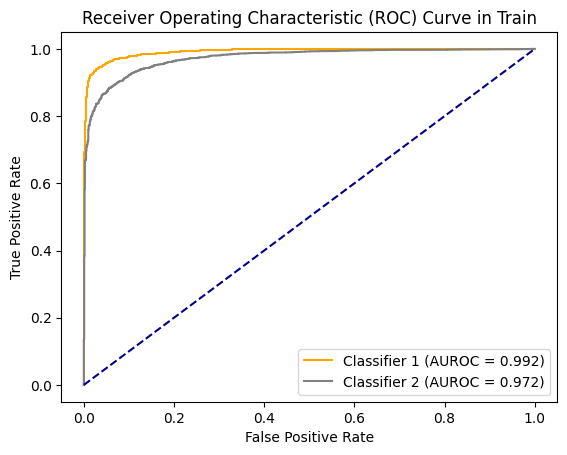

In [32]:
fpr1, tpr1, auc1 = test_roc("train", model_base)
fpr2, tpr2, auc2 = test_roc("train", eval_model)

plot_roc_cur(fpr1, tpr1, fpr2, tpr2, auc1, auc2, " in Train")

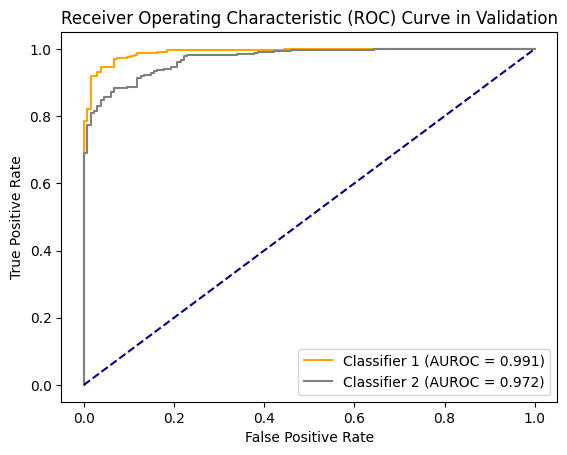

In [33]:
fpr1, tpr1, auc1 = test_roc("val", model_base)
fpr2, tpr2, auc2 = test_roc("val", eval_model)

plot_roc_cur(fpr1, tpr1, fpr2, tpr2, auc1, auc2, " in Validation")

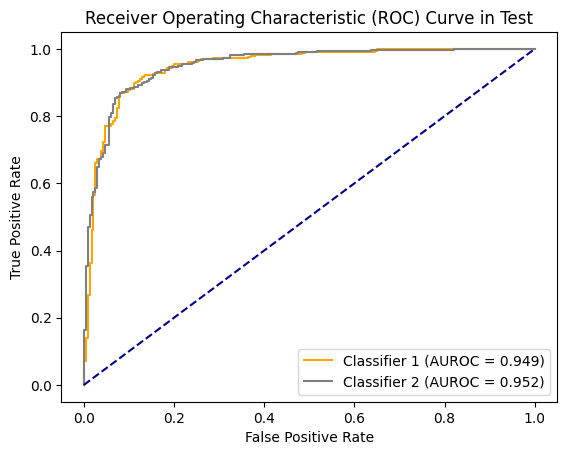

In [34]:
fpr1, tpr1, auc1 = test_roc("test", model_base)
fpr2, tpr2, auc2 = test_roc("test", eval_model)

plot_roc_cur(fpr1, tpr1, fpr2, tpr2, auc1, auc2, " in Test")

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
# COPY FROM THE OTHER TEST FUNCTION
def test_cfm(split, model, name):
    model.eval()
    y_true = torch.tensor([])
    y_score = torch.tensor([])
    
    if split == 'train':
        data_loader = train_loader_at_eval
    elif split == 'val':
        data_loader = val_loader
    else:
        data_loader = test_loader

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)

            targets = targets.to(torch.float32)
            outputs = outputs.sigmoid()
            
            y_true = torch.cat((y_true, targets), 0)
            y_score = torch.cat((y_score, outputs), 0)

        y_true = y_true.numpy()
        y_score = y_score.detach().numpy()
        y_pred = np.array([1.0 if x > 0.5 else 0.0 for x in y_score])
        ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
        
        plt.title('Confusion matrix for ' + split + ' in classfier '+ name)
        plt.show()

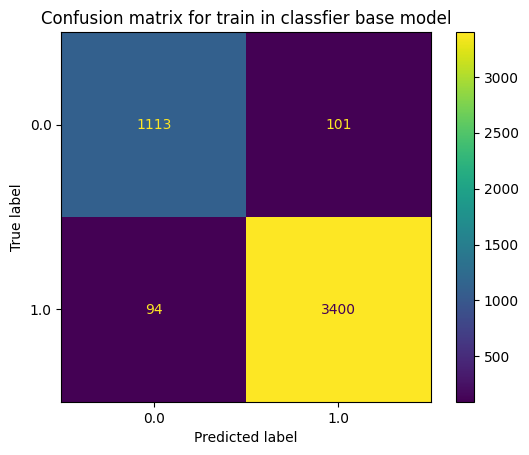

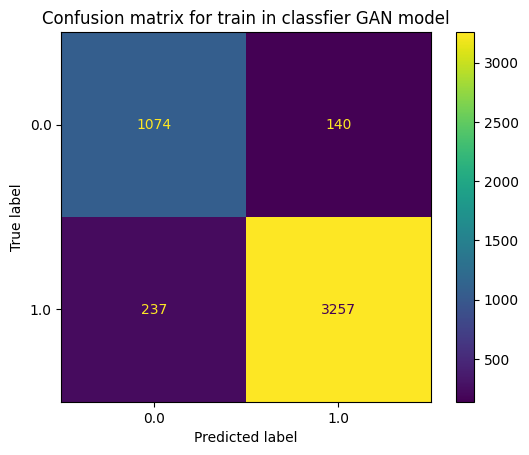

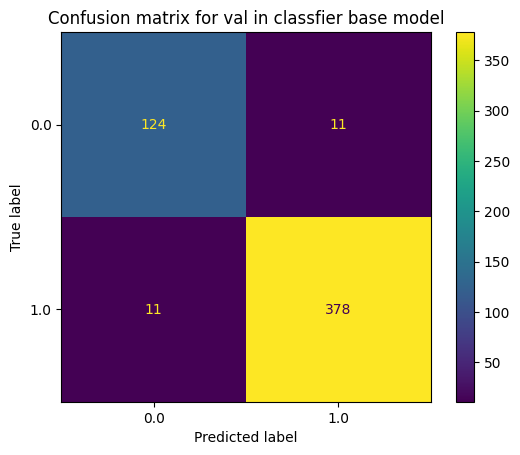

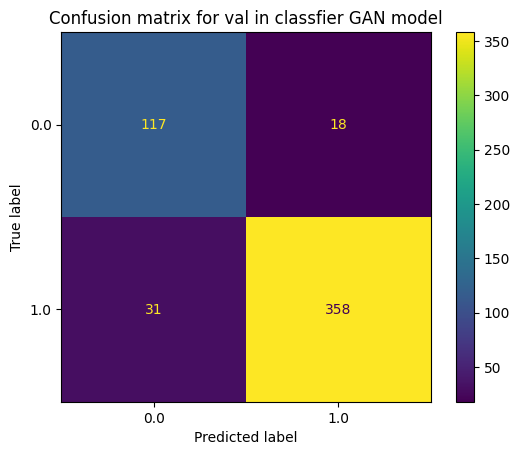

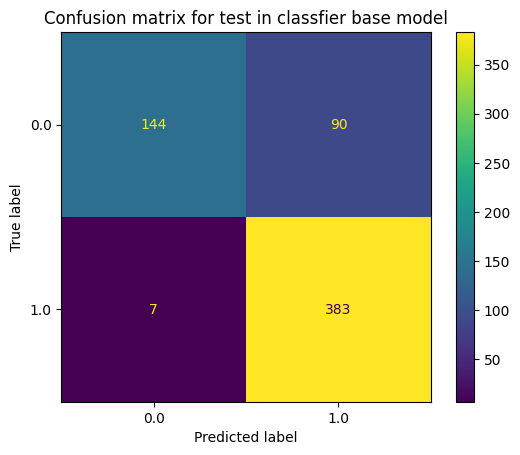

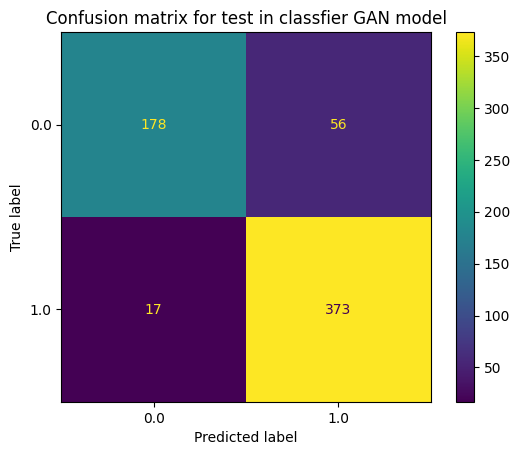

In [46]:
test_cfm('train', model_base, 'base model')
test_cfm('train', eval_model, 'GAN model')
test_cfm('val', model_base, 'base model')
test_cfm('val', eval_model, 'GAN model')
test_cfm('test', model_base, 'base model')
test_cfm('test', eval_model, 'GAN model')

How would you interpret the results you achieved? Would you say your GAN-based privatization method is useful in practice? Do you reject or accept the hypothesis defined above?

Firstly, this is the direct comparison table

|              | Baseline model, auc-acc | GAN model, auc-acc |
|--------------|-------------------------|---------------------|
| Train        | 0.992 - 0.959           | 0.972 - 0.920       |
| Validation   | 0.991 - 0.958           | 0.972 - 0.906       |
| Test         | 0.949 - 0.845           | 0.952 - 0.883       |

I believe it is acceptable to use synthetic data only in models to preserve anonimity and privacy as the results show that they perform comparatively well. We see that in all the curves the Baseline model always outperforms the model using GAN, except in test, where both models seems to perform almost equally. We can also see in the confusion matrices that both models perform comparatively similarly with slightly different biases when predicting. It seems like the GAN model tends to have more false negatives than the base model.

# 8. Reflective Account

What could be the reasons why our study did or did not succeed? What do you think are the limitations of our study? What can we learn and takeaway from this exercise? How should it inform our future work? What would you try next?

I believe that the reasons for the success is the use of a robust GAN network and a large enough dataset. With enough data we can fit GANs to generate distinct datasets for different uses, allowing the generation of more balanced datasets (since this pneumonia dataset is very unbalanced ~ 75%-25%). These balanced datasets allow for a better fit for classifications models as it has more examples from the minority class. As long as we can assure that the images generated by our GANs, or other image generation models, are close enough to real images, the models we fit should perform equally if not better.

The study we performed has some limitations in regard of the number of samples and the definition of those samples, as they are only 28x28 and only 4708 for really specific set of samples to diagnose pneumonia. Nevertheless it has proven to be effective at discerning between the normal and pneumonia class specifically, perhaps if we wanted to create a model for other diseases it may not be enough with the data we are working with.

The main takeaway would be the understanding of GANs structures and how they are used in health environments when needing to fit anonimized models. For future work in this particular study, I would try to modify the GAN architecture, as I used the one directly from the examples one as it proved to be enough for this problem.

Thank you for working on this study. We hope you enjoyed it and it was a good learning experience for you.

Please send any feedback you may have to [Richard.Osuala@ub.edu](mailto:Richard.Osuala@ub.edu).